In [1]:
using Plots
using CoolProp

In [2]:
fluidtype = "Butane" # define fluid type

"Butane"

In [3]:
T = LinRange(250, 400, 10001) # set a typical T range

10001-element LinRange{Float64, Int64}:
 250.0, 250.015, 250.03, 250.045, 250.06, …, 399.955, 399.97, 399.985, 400.0

$$v = \frac{1}{\rho}$$
$$\frac{d v}{d T} = \frac{d v}{d \rho} \frac{d \rho}{d T} = -\frac{1}{\rho^2} \frac{d \rho}{d T}$$


In [4]:
ρ = PropsSI.("D","T",T,"Q",1,fluidtype); # Q means quality, so ρ are saturated values corresponding to each T
dρdT = PropsSI.("d(D)/d(T)|sigma","T",T,"Q",1,fluidtype); # sigma means along the saturation curve, 
# CoolProp has a built-in function to calculate derivatives, very cool!

dvdT = -1 ./ ρ ./ ρ .* dρdT; # get dv,v/dT

In [5]:
P = PropsSI.("P","T",T,"Q",1,fluidtype); # get saturated Pressure corresponding to each T

In [12]:
dPdT = PropsSI.("d(P)/d(T)|sigma","T",T,"Q",1,fluidtype); # get saturated Pressure corresponding to each T

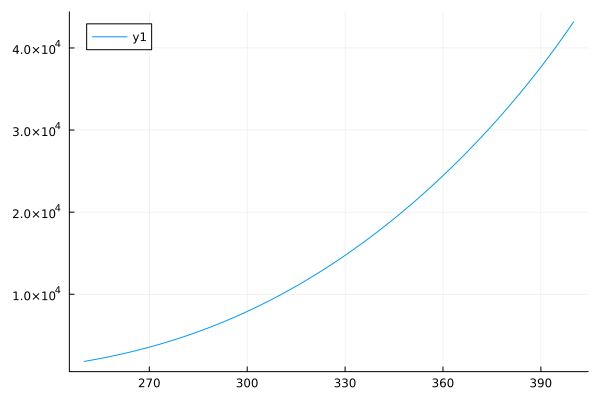

In [13]:
plot(T,dPdT)

In [7]:
CVMASS =  PropsSI.("CVMASS","T",T,"Q",1,fluidtype); # get saturated Cv,v corresponding to each T

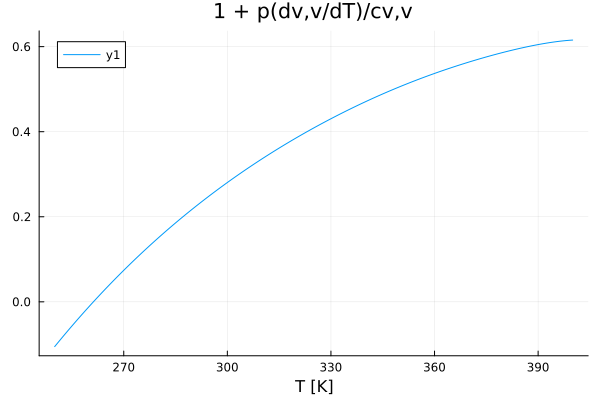

In [8]:
plot(T,1 .+ (P .* dvdT) ./ CVMASS, xlabel="T [K]", title = "1 + p(dv,v/dT)/cv,v") # plot the value you interested v.s. temperature

In [9]:
savefig("first quantity.pdf")

"/Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/examples/first quantity.pdf"

In [10]:
dUdT = PropsSI.("d(U)/d(T)|sigma","T",T,"Q",1,fluidtype)

10001-element Vector{Float64}:
 1284.7251733639534
 1284.7571180182492
 1284.7890590179222
 1284.8209963622837
 1284.852930050649
 1284.8848600823308
 1284.9167864566427
 1284.948709172899
 1284.9806282304085
 1285.0125436284898
 1285.0444553664513
 1285.0763634436055
 1285.1082678592672
    ⋮
  803.3727302843108
  802.9060259964908
  802.4388435397259
  801.9711821888382
  801.503041216813
  801.0344198955349
  800.5653174950248
  800.0957332839107
  799.6256665291121
  799.1551164962834
  798.6840824491487
  798.2125636503179

In [11]:
dUdT = PropsSI.("d(U)/d(T)|D","T",T,"Q",1,fluidtype)

10001-element Vector{Float64}:
 1364.0434785023092
 1364.1079201733692
 1364.1723663035286
 1364.2368168925932
 1364.3012719403666
 1364.3657314466545
 1364.4301954112605
 1364.4946638339902
 1364.5591367146453
 1364.6236140530327
 1364.688095848954
 1364.7525821022132
 1364.8170728126133
    ⋮
 2208.093115223224
 2208.2227420953313
 2208.352401144923
 2208.482092401209
 2208.6118158934837
 2208.741571651069
 2208.871359703369
 2209.001180079841
 2209.1310328100153
 2209.2609179234582
 2209.39083544983
 2209.520785418815

In [12]:
CVMASS =  PropsSI.("CVMASS","T",T,"Q",1,fluidtype)

10001-element Vector{Float64}:
 1364.0434785023092
 1364.1079201733692
 1364.1723663035286
 1364.2368168925932
 1364.3012719403666
 1364.3657314466545
 1364.4301954112605
 1364.49466383399
 1364.5591367146453
 1364.6236140530327
 1364.688095848954
 1364.7525821022134
 1364.8170728126133
    ⋮
 2208.093115223224
 2208.2227420953313
 2208.352401144923
 2208.482092401209
 2208.6118158934837
 2208.741571651069
 2208.871359703369
 2209.0011800798416
 2209.1310328100153
 2209.2609179234587
 2209.3908354498294
 2209.520785418815

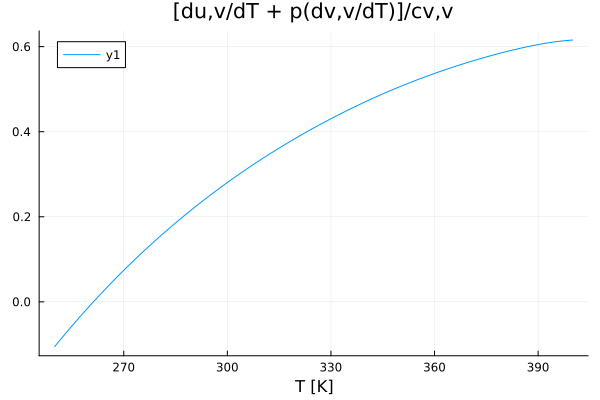

In [13]:
plot(T,(dUdT .+ P .* dvdT) ./ CVMASS, xlabel="T [K]", title = "[du,v/dT + p(dv,v/dT)]/cv,v") # plot the value you interested v.s. temperature

In [33]:
savefig("second quantity.pdf")

"/Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/examples/second quantity.pdf"